# Credit risk reduction models
**Bartłomiej Jamiołkowski 28.03.2022**

## Exercise 1

The assumption about the normal distribution of losses for credit risk is not correct. This is justified by the CreditMetrics documentation, which states that, unlike returns on capital, returns on loans are skewed.
The long negative tail of the distribution of credit returns is due to default. They are characterized by a high probability of obtaining a small profit (interest) and a low probability of losing large amounts of money. Correlations, which are assumed to be uniform across the portfolio, may be another factor.

## Exercise 2

**Libraries**

In [41]:
options(warn=-1)
library(MASS)
library(tidyverse)
library(csabounds)

**Creation of correlation matrix**

Z załozenia macierz korelacji ma postać: r12 = 0.3, r13 = 0.2, r23 = 0.15.

In [2]:
correlation_matrix <- matrix(c(1.00, 0.30, 0.20, 0.30, 1.00, 0.15, 0.20, 0.15, 1.00), nrow = 3, byrow = TRUE)
colnames(correlation_matrix) <-c("Firm 1","Firm 2", "Firm 3")
rownames(correlation_matrix) <-c("Firm 1","Firm 2", "Firm 3")
print(correlation_matrix)

       Firm 1 Firm 2 Firm 3
Firm 1    1.0   0.30   0.20
Firm 2    0.3   1.00   0.15
Firm 3    0.2   0.15   1.00


**Generating scenarios**

Correlated data is generated consisting of 20,000 observations from a multivariate normal distribution, where the mean / expected values are from the CreditMetrics table based on the collateral status of the bonds, e.g. seniority secured etc.

In [3]:
set.seed(5)
ma = c(0.3274, 0.5380, 0.5113)
scenarios <- as.data.frame(mvrnorm(n = 20000, mu = ma, Sigma = correlation_matrix))

In [4]:
head(scenarios)

Firm 1,Firm 2,Firm 3
-0.8701109,0.5483039,-0.01374196
1.3857238,2.1130691,0.61066822
-0.6137376,-1.0203884,0.55544367
0.8183878,0.5683423,0.01432629
2.3463760,2.1014218,0.18807102
-0.8064094,-0.3691785,1.60249143


**Checking for each bond how the random number affects its rating**

Rating A

<div>
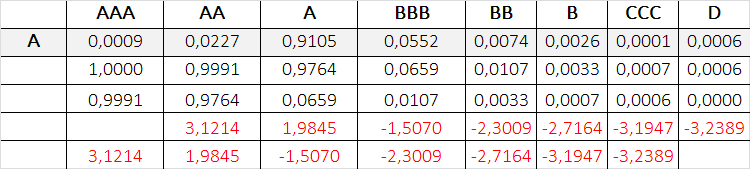
</div>

Rating BB

<div>
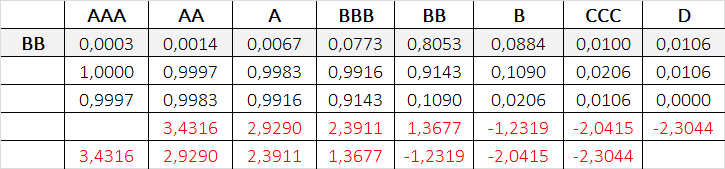
</div>

Rating CCC

<div>
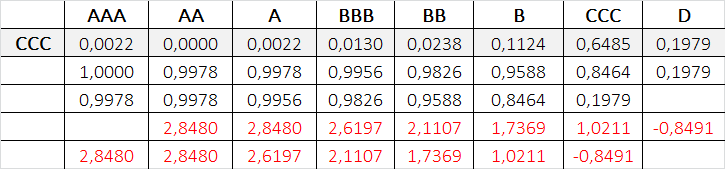
</div>

In [5]:
scenarios['New Rating 1'] <- rep(NA, 20000)
scenarios['New Rating 2'] <- rep(NA, 20000)
scenarios['New Rating 3'] <- rep(NA, 20000)

In [6]:
for(i in 1:20000){
    if(scenarios$'Firm 1'[i] > 3.1214){
        scenarios$'New Rating 1'[i] = 'AAA'
    }
    else if(scenarios$'Firm 1'[i] <= 3.1214 && scenarios$'Firm 1'[i] > 1.9845){
        scenarios$'New Rating 1'[i] = 'AA'
    }
    else if(scenarios$'Firm 1'[i] <= 1.9845 && scenarios$'Firm 1'[i] > -0.5070){
        scenarios$'New Rating 1'[i] = 'A'
    }
    else if(scenarios$'Firm 1'[i] <= -0.5070 && scenarios$'Firm 1'[i] > -2.3009){
        scenarios$'New Rating 1'[i] = 'BBB'
    }
    else if(scenarios$'Firm 1'[i] <= -2.3009 && scenarios$'Firm 1'[i] > -2.7164){
        scenarios$'New Rating 1'[i] = 'BB'
    }
    else if(scenarios$'Firm 1'[i] <= -2.7164 && scenarios$'Firm 1'[i] > -3.1947){
        scenarios$'New Rating 1'[i] = 'B'
    }
    else if(scenarios$'Firm 1'[i] <= -3.1947 && scenarios$'Firm 1'[i] > -3.2389){
        scenarios$'New Rating 1'[i] = 'CCC'
    }
    else if(scenarios$'Firm 1'[i] <= -3.2389){
        scenarios$'New Rating 1'[i] = 'D'
    }    
}

In [7]:
for(i in 1:20000){
    if(scenarios$'Firm 2'[i] > 3.4316){
        scenarios$'New Rating 2'[i] = 'AAA'
    }
    else if(scenarios$'Firm 2'[i] <= 3.4316 && scenarios$'Firm 2'[i] > 2.9290){
        scenarios$'New Rating 2'[i] = 'AA'
    }
    else if(scenarios$'Firm 2'[i] <= 2.9290 && scenarios$'Firm 2'[i] > 2.3911){
        scenarios$'New Rating 2'[i] = 'A'
    }
    else if(scenarios$'Firm 2'[i] <= 2.3911 && scenarios$'Firm 2'[i] > 1.3677){
        scenarios$'New Rating 2'[i] = 'BBB'
    }
    else if(scenarios$'Firm 2'[i] <= 1.3677 && scenarios$'Firm 2'[i] > -1.2319){
        scenarios$'New Rating 2'[i] = 'BB'
    }
    else if(scenarios$'Firm 2'[i] <= -1.2319 && scenarios$'Firm 2'[i] > -2.0415){
        scenarios$'New Rating 2'[i] = 'B'
    }
    else if(scenarios$'Firm 2'[i] <= -2.0415 && scenarios$'Firm 2'[i] > -2.3044){
        scenarios$'New Rating 2'[i] = 'CCC'
    }
    else if(scenarios$'Firm 2'[i] <= -2.3044){
        scenarios$'New Rating 2'[i] = 'D'
    }    
}

In [8]:
for(i in 1:20000){
    if(scenarios$'Firm 3'[i] > 2.8480){
        scenarios$'New Rating 3'[i] = 'AAA'
    }
    else if(scenarios$'Firm 3'[i] <= 2.8480 && scenarios$'Firm 3'[i] > 2.8480){
        scenarios$'New Rating 2'[i] = 'AA'
    }
    else if(scenarios$'Firm 3'[i] <= 2.8480 && scenarios$'Firm 3'[i] > 2.6197){
        scenarios$'New Rating 3'[i] = 'A'
    }
    else if(scenarios$'Firm 3'[i] <= 2.6197 && scenarios$'Firm 3'[i] > 2.1107){
        scenarios$'New Rating 3'[i] = 'BBB'
    }
    else if(scenarios$'Firm 3'[i] <= 2.1107 && scenarios$'Firm 3'[i] > 1.7369){
        scenarios$'New Rating 3'[i] = 'BB'
    }
    else if(scenarios$'Firm 3'[i] <= 1.7369 && scenarios$'Firm 3'[i] > 1.0211){
        scenarios$'New Rating 3'[i] = 'B'
    }
    else if(scenarios$'Firm 3'[i] <= 1.0211 && scenarios$'Firm 3'[i] > -0.8491){
        scenarios$'New Rating 3'[i] = 'CCC'
    }
    else if(scenarios$'Firm 3'[i] <= -0.8491){
        scenarios$'New Rating 3'[i] = 'D'
    }    
}

In [9]:
head(scenarios)

Firm 1,Firm 2,Firm 3,New Rating 1,New Rating 2,New Rating 3
-0.8701109,0.5483039,-0.01374196,BBB,BB,CCC
1.3857238,2.1130691,0.61066822,A,BBB,CCC
-0.6137376,-1.0203884,0.55544367,BBB,BB,CCC
0.8183878,0.5683423,0.01432629,A,BB,CCC
2.3463760,2.1014218,0.18807102,AA,BBB,CCC
-0.8064094,-0.3691785,1.60249143,BBB,BB,B


**Examples of one-year forward zero curves by credit rating category (%)**

The columns contain the percentages for the 5, 3, and 4-year bonds in the CreditMetrics table.

In [10]:
bond_values <- data.frame(
  Firm1  = c(5.12, 5.17, 5.32, 5.63, 7.27, 8.52, 13.52),
  Firm2 = c(4.17, 4.22, 4.32, 4.67, 6.02, 7.02, 15.02),
  Firm3 = c(4.73, 4.78, 4.93, 5.25, 6.78, 8.03, 14.03)
)
colnames(bond_values) <- c('Firm 1', 'Firm 2', 'Firm 3')
rownames(bond_values) <- c('AAA', 'AA', 'A','BBB', 'BB', 'B', 'CCC')

In [11]:
bond_values

,Firm 1,Firm 2,Firm 3
AAA,5.12,4.17,4.73
AA,5.17,4.22,4.78
A,5.32,4.32,4.93
BBB,5.63,4.67,5.25
BB,7.27,6.02,6.78
B,8.52,7.02,8.03
CCC,13.52,15.02,14.03


Converting interest into amounts.

In [12]:
for(i in 1:7){      
  bond_values$'Firm 1'[i] <- round(10000/(bond_values$'Firm 1'[i]/100 + 1), digits = 2)
  bond_values$'Firm 2'[i] <- round(10000/(bond_values$'Firm 2'[i]/100 + 1), digits = 2)
  bond_values$'Firm 3'[i] <- round(5000/(bond_values$'Firm 3'[i]/100 + 1), digits = 2)
}

In [13]:
bond_values

,Firm 1,Firm 2,Firm 3
AAA,9512.94,9599.69,4774.18
AA,9508.41,9595.09,4771.90
A,9494.87,9585.89,4765.08
BBB,9467.01,9553.84,4750.59
BB,9322.27,9432.18,4682.52
B,9214.89,9344.05,4628.34
CCC,8809.02,8694.14,4384.81


In [14]:
bond_values['D',] <- c(0.3274*10000, 0.53808*10000, 0.5113*5000)

In [15]:
bond_values

,Firm 1,Firm 2,Firm 3
AAA,9512.94,9599.69,4774.18
AA,9508.41,9595.09,4771.90
A,9494.87,9585.89,4765.08
BBB,9467.01,9553.84,4750.59
BB,9322.27,9432.18,4682.52
B,9214.89,9344.05,4628.34
CCC,8809.02,8694.14,4384.81
D,3274.00,5380.80,2556.50


At this stage, purchases are added to the returns on purchased bonds. In task 2, the company has an annual coupon of 500 for 3 years which equals 1,500. The third company also offers an annual coupon of 500 for 4 years or 2,000. The values of these coupons are added to the returns of 10,000 investments in the bonds listed. companies.

In [16]:
for(i in 1:8){
    bond_values$'Firm 2'[i] = bond_values$'Firm 2'[i] + 1500.00
    bond_values$'Firm 3'[i] = bond_values$'Firm 3'[i] + 2000.00
}

In [17]:
bond_values

,Firm 1,Firm 2,Firm 3
AAA,9512.94,11099.69,6774.18
AA,9508.41,11095.09,6771.90
A,9494.87,11085.89,6765.08
BBB,9467.01,11053.84,6750.59
BB,9322.27,10932.18,6682.52
B,9214.89,10844.05,6628.34
CCC,8809.02,10194.14,6384.81
D,3274.00,6880.80,4556.50


**Assignment of amounts to corporate bonds depending on the rating**

In [18]:
for(i in 1:20000){
    if(scenarios$'New Rating 1'[i] == 'AAA'){
        scenarios$'Firm 1'[i] = bond_values[1, 1]
    }
    else if(scenarios$'New Rating 1'[i] == 'AA'){
        scenarios$'Firm 1'[i] = bond_values[2, 1]
    }
    else if(scenarios$'New Rating 1'[i] == 'A'){
        scenarios$'Firm 1'[i] = bond_values[3, 1]
    }
    else if(scenarios$'New Rating 1'[i] == 'BBB'){
        scenarios$'Firm 1'[i] = bond_values[4, 1]
    }
    else if(scenarios$'New Rating 1'[i] == 'BB'){
        scenarios$'Firm 1'[i] = bond_values[5, 1]
    }
    else if(scenarios$'New Rating 1'[i] == 'B'){
        scenarios$'Firm 1'[i] = bond_values[6, 1]
    }
    else if(scenarios$'New Rating 1'[i] == 'CCC'){
        scenarios$'Firm 1'[i] = bond_values[7, 1]
    }
    else if(scenarios$'New Rating 1'[i] == 'D'){
        scenarios$'Firm 1'[i] = bond_values[8, 1]
    }    
}

In [19]:
for(i in 1:20000){
    if(scenarios$'New Rating 2'[i] == 'AAA'){
        scenarios$'Firm 2'[i] = bond_values[1, 2]
    }
    else if(scenarios$'New Rating 2'[i] == 'AA'){
        scenarios$'Firm 2'[i] = bond_values[2, 2]
    }
    else if(scenarios$'New Rating 2'[i] == 'A'){
        scenarios$'Firm 2'[i] = bond_values[3, 2]
    }
    else if(scenarios$'New Rating 2'[i] == 'BBB'){
        scenarios$'Firm 2'[i] = bond_values[4, 2]
    }
    else if(scenarios$'New Rating 2'[i] == 'BB'){
        scenarios$'Firm 2'[i] = bond_values[5, 2]
    }
    else if(scenarios$'New Rating 2'[i] == 'B'){
        scenarios$'Firm 2'[i] = bond_values[6, 2]
    }
    else if(scenarios$'New Rating 2'[i] == 'CCC'){
        scenarios$'Firm 2'[i] = bond_values[7, 2]
    }
    else if(scenarios$'New Rating 2'[i] == 'D'){
        scenarios$'Firm 2'[i] = bond_values[8, 2]
    }    
}

In [20]:
for(i in 1:20000){
    if(scenarios$'New Rating 3'[i] == 'AAA'){
        scenarios$'Firm 3'[i] = bond_values[1, 1]
    }
    else if(scenarios$'New Rating 3'[i] == 'AA'){
        scenarios$'Firm 3'[i] = bond_values[2, 1]
    }
    else if(scenarios$'New Rating 3'[i] == 'A'){
        scenarios$'Firm 3'[i] = bond_values[3, 1]
    }
    else if(scenarios$'New Rating 3'[i] == 'BBB'){
        scenarios$'Firm 3'[i] = bond_values[4, 1]
    }
    else if(scenarios$'New Rating 3'[i] == 'BB'){
        scenarios$'Firm 3'[i] = bond_values[5, 1]
    }
    else if(scenarios$'New Rating 3'[i] == 'B'){
        scenarios$'Firm 3'[i] = bond_values[6, 1]
    }
    else if(scenarios$'New Rating 3'[i] == 'CCC'){
        scenarios$'Firm 3'[i] = bond_values[7, 1]
    }
    else if(scenarios$'New Rating 3'[i] == 'D'){
        scenarios$'Firm 3'[i] = bond_values[8, 1]
    }    
}

**Portfolio creation**

In [21]:
scenarios['Portfolio'] <- rep(NA, 20000)

In [22]:
for(i in 1:20000){
    scenarios$'Portfolio'[i] = scenarios$'Firm 1'[i] + scenarios$'Firm 1'[i] + scenarios$'Firm 1'[i]
}

In [23]:
head(scenarios)

Firm 1,Firm 2,Firm 3,New Rating 1,New Rating 2,New Rating 3,Portfolio
9467.01,10932.18,8809.02,BBB,BB,CCC,28401.03
9494.87,11053.84,8809.02,A,BBB,CCC,28484.61
9467.01,10932.18,8809.02,BBB,BB,CCC,28401.03
9494.87,10932.18,8809.02,A,BB,CCC,28484.61
9508.41,11053.84,8809.02,AA,BBB,CCC,28525.23
9467.01,10932.18,9214.89,BBB,BB,B,28401.03


**Sorting data frame by portfolio value**

In [24]:
scenarios <- scenarios[order(scenarios$Portfolio),]

In [25]:
head(scenarios)

,Firm 1,Firm 2,Firm 3,New Rating 1,New Rating 2,New Rating 3,Portfolio
2703,3274,10844.05,3274.00,D,B,D,9822
9417,3274,10194.14,8809.02,D,CCC,CCC,9822
12666,3274,10844.05,3274.00,D,B,D,9822
14905,3274,10844.05,9322.27,D,B,BB,9822
16897,3274,10932.18,8809.02,D,BB,CCC,9822
19094,3274,10932.18,8809.02,D,BB,CCC,9822


**VaR determination based on 0.001% of the lowest returns**

After conversion, it is the 20th position in the sorted portfolio (20 = 20,000 * 0.001)

In [26]:
scenarios$Portfolio[20] 

[1] 27644.67

## Exercise 3

In the case at hand, the ratings are not correlated. Therefore, the 3 probabilities are multiplied and the amounts added up.

**Creation of portfolio probability matrix**

Multiplying 3 probability matrices.

In [27]:
A_p_matrix <- matrix(c(0.0009, 0.0227, 0.9105, 0.0552, 0.0074, 0.0026, 0.0001, 0.0006), nrow=8, ncol = 1)
BB_p_matrix = c(0.0003, 0.0014, 0.0067, 0.0773, 0.8053, 0.0884, 0.0100, 0.0106)
CCC_p_matrix <- c(0.0022, 0.0000, 0.0022, 0.0130, 0.0238, 0.1124, 0.6485, 0.1979)

In [28]:
A_p_matrix

0.0009
0.0227
0.9105
0.0552
0.0074
0.0026
0.0001
0.0006


In [29]:
BB_p_matrix

[1] 0.0003 0.0014 0.0067 0.0773 0.8053 0.0884 0.0100 0.0106

In [30]:
CCC_p_matrix

[1] 0.0022 0.0000 0.0022 0.0130 0.0238 0.1124 0.6485 0.1979

In [31]:
ABB_p_matrix <- A_p_matrix%*%BB_p_matrix
rownames(ABB_p_matrix) <- c('AAA', 'AA', 'A','BBB', 'BB', 'B', 'CCC', 'D')
colnames(ABB_p_matrix) <- c('AAA', 'AA', 'A','BBB', 'BB', 'B', 'CCC', 'D')
ABB_p_matrix

,AAA,AA,A,BBB,BB,B,CCC,D
AAA,0.00000027,0.00000126,0.00000603,0.00006957,0.00072477,0.00007956,0.000009,0.00000954
AA,0.00000681,0.00003178,0.00015209,0.00175471,0.01828031,0.00200668,0.000227,0.00024062
A,0.00027315,0.00127470,0.00610035,0.07038165,0.73322565,0.08048820,0.009105,0.00965130
BBB,0.00001656,0.00007728,0.00036984,0.00426696,0.04445256,0.00487968,0.000552,0.00058512
BB,0.00000222,0.00001036,0.00004958,0.00057202,0.00595922,0.00065416,0.000074,0.00007844
B,0.00000078,0.00000364,0.00001742,0.00020098,0.00209378,0.00022984,0.000026,0.00002756
CCC,0.00000003,0.00000014,0.00000067,0.00000773,0.00008053,0.00000884,0.000001,0.00000106
D,0.00000018,0.00000084,0.00000402,0.00004638,0.00048318,0.00005304,0.000006,0.00000636


In [32]:
ABBCCC_p_matrix <- round(ABB_p_matrix %*% CCC_p_matrix, digits = 6)
ABBCCC_p_matrix 

AAA,0.000035
AA,0.000879
A,0.035241
BBB,0.002137
BB,0.000286
B,0.000101
CCC,0.000004
D,0.000023


**Creation of a vector of portfolio value**

In [34]:
for(i in 1:7){
    A_value[i] = 10000/(1 + A_value[i])
    BB_value[i] = 10000/(1 + BB_value[i]) + 1500
    CCC_value[i] = 5000/(1 + CCC_value[i]) + 2000
}

In [35]:
portfolio_value <- rep(NA, 8)
for(i in 1:8){
    portfolio_value[i] <- A_value[i] + BB_value[i] + CCC_value[i]
}

In [36]:
portfolio_value

[1]  7940.823  7901.506  7805.148  7571.964  6776.365  6351.013  5145.593
[8] 14711.300

**VaR calculation**

In [37]:
sum_pi <- cumsum(as.vector(ABBCCC_p_matrix))  

In [38]:
scenarios <- data.frame(
value_Xi <- portfolio_value,
pi <- as.vector(ABBCCC_p_matrix),
sum_pi <- sum_pi)
colnames(scenarios) <- c('value Xi', 'pi', 'sum pi')

In [39]:
scenarios

value Xi,pi,sum pi
7940.823,0.000035,0.000035
7901.506,0.000879,0.000914
7805.148,0.035241,0.036155
7571.964,0.002137,0.038292
6776.365,0.000286,0.038578
6351.013,0.000101,0.038679
5145.593,0.000004,0.038683
14711.300,0.000023,0.038706


In [40]:
scenarios[8,1]

[1] 14711.3

The conclusions are similar to those from another project. The more differentiated the basket is (in an ideal situation there are no correlations), the smaller the maximum loss is.